In [1]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

review = pd.read_csv('/Users/i055546/Desktop/Python-jupyter/universal_studio_branches.csv')
review.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


In [2]:
#!pip install wordcloud

In [3]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Data Cleaning

In [4]:
# checking for missing values
review.isnull().sum()

reviewer        0
rating          0
written_date    0
title           0
review_text     0
branch          0
dtype: int64

In [5]:
Review=review.dropna()

In [6]:
# check duplicates

print('Number of duplicated records: ', Review.duplicated(keep='first').sum())

Number of duplicated records:  45


In [7]:
#Drop duplicates

indx = Review[Review.duplicated(keep='first')].index
Review.drop(index = indx, inplace= True)
Review.shape

(50859, 6)

In [8]:
#change "rating" from float to int
Review['rating']= Review['rating'].astype(int)
Review.dtypes

reviewer        object
rating           int64
written_date    object
title           object
review_text     object
branch          object
dtype: object

In [9]:
Review['written_date'] = pd.to_datetime(Review['written_date'])
Review.dtypes

reviewer                object
rating                   int64
written_date    datetime64[ns]
title                   object
review_text             object
branch                  object
dtype: object

In [10]:
Review['branch'].unique()

array(['Universal Studios Florida', 'Universal Studios Japan',
       'Universal Studios Singapore'], dtype=object)

In [11]:
Review['branch'] = Review['branch'].astype('category')
Review.dtypes

reviewer                object
rating                   int64
written_date    datetime64[ns]
title                   object
review_text             object
branch                category
dtype: object

In [12]:
Review.loc[44,'review_text']

'✅ $850💵 + ⏰ hours of high heat 91 degrees🔥 & 😷☀️. We were shocked to be in long lines walking about 7.5 miles for the day masked up! Like sheep 🐑 being threatened constantly with loud speaker 🔈announcements demanding no drinking 🥤or eating while walking 🚶\u200d♀️& maintain social distancing, wearing a mask at all times or being 👢booted from the park. I saw kids 👆touching all handrails and then putting hands in their parents cups eating ice and then the parents gulping down the remainder(at $10 per beverage can you blame them) 🤷\u200d♂️ confused I do thousands of people show up to spend 💰💰💰💰💰💰if they are paranoid of public places! Universal Studios is a germs 🦠 paradise! They also pray on people’s wallets with the nifty reservation system it allows them to supply and demand fast passes from $80 extra to $249 demanding on all the variables they control! We despised being ordered around with lousy customer service! Constant loud interruptions🛑 during the rides 🎢demanding guests wear a ma

In [13]:
import re
import string
def text_clean(text):
    
    #conver to lower text
    text = text.lower()
    
    ## Decontract text            
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'clock", "f the clock", text)
    text = re.sub(r"\'cause", " because", text)
    
    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    
    # remove all puctuation
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # text = re.sub('\w*\d\w*', '', text) #remove digit/number
    
    # remove all special characters
    text = re.sub(r'\W', ' ', text)

    # remove break
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    
    # remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text

In [14]:
Review['review_text'] = Review['review_text'].apply(lambda x: text_clean(x))
Review['title'] = Review['title'].apply(lambda x: text_clean(x))

In [15]:
Review.loc[44,'review_text']

' 850 hours of high heat 91 degrees we were shocked to be in long lines walking about 75 miles for the day masked up like sheep being threatened constantly with loud speaker announcements demanding no drinking or eating while walking maintain social distancing wearing a mask at all times or being booted from the park i saw kids touching all handrails and then putting hands in their parents cups eating ice and then the parents gulping down the remainderat 10 per beverage can you blame them confused i do thousands of people show up to spend if they are paranoid of public places universal studios is a germs paradise they also pray on people is wallets with the nifty reservation system it allows them to supply and demand fast passes from 80 extra to 249 demanding on all the variables they control we despised being ordered around with lousy customer service constant loud interruptions during the rides demanding guests wear a mask save yourself the money headaches and do not go it is ridicul

In [16]:
Review.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2,2021-05-30,universal is a complete disaster stick with di...,we went to universal over memorial day weekend...,Universal Studios Florida
1,Jon,1,2021-05-30,food is hard to get,the food service is horrible i am not reviewin...,Universal Studios Florida
2,Nerdy P,2,2021-05-30,disappointed,i booked this vacation mainly to ride hagrid m...,Universal Studios Florida
3,ran101278,4,2021-05-29,my opinion,when a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5,2021-05-28,the bourne stuntacularmust see,ok i can not stress enough to anyone and every...,Universal Studios Florida


# Data Exploration and Visualization

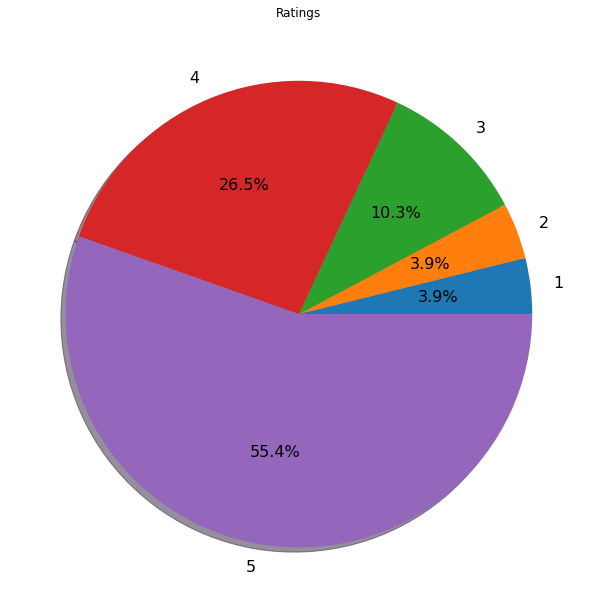

In [17]:
# data = data.dropna()
title = Review.groupby('rating').agg('count')
# print(title_type)
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np

# sort the indices and counts for our aggregated types:
type_labels = title.branch.sort_values().index 
type_counts = title.branch.sort_values()

# specify the figure details:
plt.figure(1, figsize = (23,25)) 
the_grid = GridSpec(2, 2)

#Finally, let’s plot our pie chart:
plt.figure(1, figsize = (20,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral') #inferno, red, viridis, Spectral, summer, hsv , YlGn, BuPu
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect = 1, title = 'Ratings')
type_show_ids = plt.pie(type_counts, labels = type_labels, autopct = '%1.1f%%', shadow = True, textprops = {'fontsize': 16})
plt.show()

In [18]:
rating=Review['rating'].value_counts()
rating

5    28179
4    13501
3     5226
2     1984
1     1969
Name: rating, dtype: int64

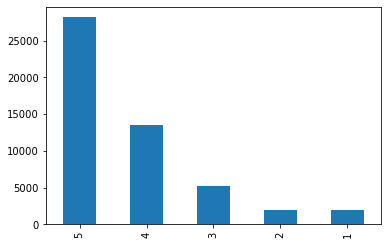

In [19]:
#import matplotlib.pyplot as plt
import seaborn as sns
rating_chart=Review['rating'].value_counts().plot.bar()
plt.show()

# WordCloud on title column based on rating

In [20]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

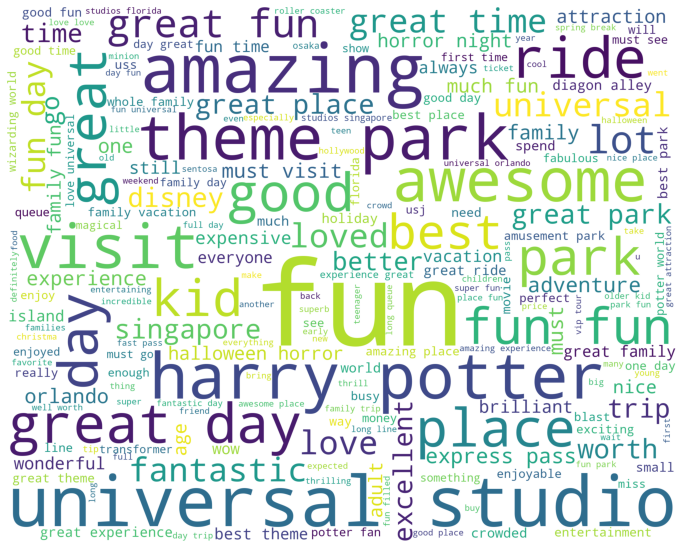

In [21]:
title_positive = Review[Review['rating']>=4]['title']

title_positive

wordcloud1 = WordCloud(
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(' '.join(title_positive))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

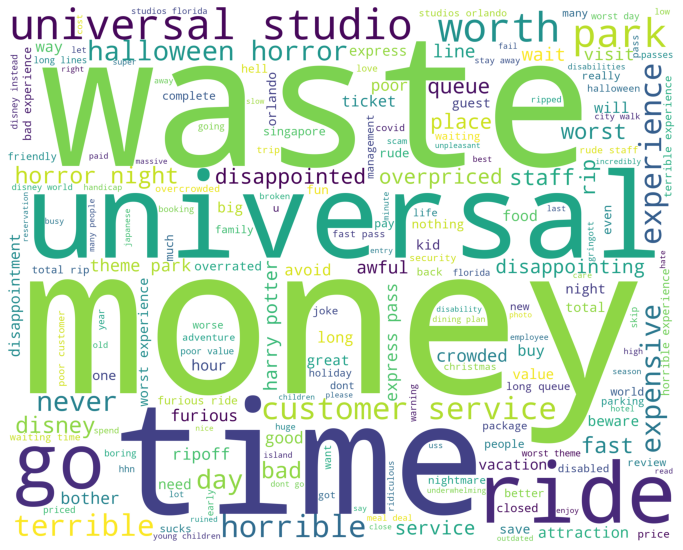

In [22]:
from nltk.corpus import stopwords
title_negative = Review[Review['rating']<2]['title']

wordcloud2 = WordCloud(
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(title_negative))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

# Convert LowerCase, Remove Punctuation Number and Tokenize

In [23]:
def tokenize(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalpha()]
    return text

Review['review_text'] = Review['review_text'].apply(lambda x: tokenize(x))
Review['title'] = Review['title'].apply(lambda x: tokenize(x))

In [24]:
Review.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2,2021-05-30,"[universal, is, a, complete, disaster, stick, ...","[we, went, to, universal, over, memorial, day,...",Universal Studios Florida
1,Jon,1,2021-05-30,"[food, is, hard, to, get]","[the, food, service, is, horrible, i, am, not,...",Universal Studios Florida
2,Nerdy P,2,2021-05-30,[disappointed],"[i, booked, this, vacation, mainly, to, ride, ...",Universal Studios Florida
3,ran101278,4,2021-05-29,"[my, opinion]","[when, a, person, tries, the, test, seat, for,...",Universal Studios Florida
4,tammies20132015,5,2021-05-28,"[the, bourne, stuntacularmust, see]","[ok, i, can, not, stress, enough, to, anyone, ...",Universal Studios Florida


# Remove Stopwords

In [25]:
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
def remove_stopwords(text):
    text = [w for w in text if w not in stop_words]
    return ' '.join(text)

Review['review_text'] = Review['review_text'].apply(lambda x: remove_stopwords(x))
Review['title'] = Review['title'].apply(lambda x: remove_stopwords(x))
Review.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2,2021-05-30,universal complete disaster stick disney,went universal memorial day weekend total trai...,Universal Studios Florida
1,Jon,1,2021-05-30,food hard get,food service horrible reviewing food wait time...,Universal Studios Florida
2,Nerdy P,2,2021-05-30,disappointed,booked vacation mainly ride hagrid motorcycle ...,Universal Studios Florida
3,ran101278,4,2021-05-29,opinion,person tries test seat rides gets green light ...,Universal Studios Florida
4,tammies20132015,5,2021-05-28,bourne stuntacularmust see,ok stress enough anyone everyone go universal ...,Universal Studios Florida


# Chunking - Adjective

In [26]:
# function to process adjective - this code will take 1-2 mins to run. Please be patient
def pre_process_adj(text):
    words = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(words)
    adjectives = [word for word,pos in tagged 
            if (pos == 'JJ')]
    return adjectives

Review['review_text.adj'] = Review['review_text'].apply(lambda x: pre_process_adj(x))
Review['title.adj'] = Review['title'].apply(lambda x: pre_process_adj(x))
Review.head()

,reviewer,rating,written_date,title,review_text,branch,review_text.adj,title.adj
0,Kelly B,2,2021-05-30,universal complete disaster stick disney,went universal memorial day weekend total trai...,Universal Studios Florida,"[universal, memorial, total, prime, wasted, ex...","[universal, complete]"
1,Jon,1,2021-05-30,food hard get,food service horrible reviewing food wait time...,Universal Studios Florida,"[horrible, minimum, whole]",[hard]
2,Nerdy P,2,2021-05-30,disappointed,booked vacation mainly ride hagrid motorcycle ...,Universal Studios Florida,"[hagrid, disappointing, find, virtual, entire,...",[disappointed]
3,ran101278,4,2021-05-29,opinion,person tries test seat rides gets green light ...,Universal Studios Florida,"[green, long, ride, actual, express]",[]
4,tammies20132015,5,2021-05-28,bourne stuntacularmust see,ok stress enough anyone everyone go universal ...,Universal Studios Florida,"[ok, universal, make, sure, see, bourne, stunt...",[bourne]


# potter stemming - vader

In [27]:
# Data cleanup using PorterStemmer
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# function to stem the words
def stem(words): 
    stemmer = PorterStemmer()
    stem_words = []
    for x in words:
        stem_words.append(stemmer.stem(x))
    return ' '.join(stem_words)

Review["title.adj"] = Review['title.adj'].apply(stem)
Review["review_text.adj"] = Review['review_text.adj'].apply(stem)
# Cleaned data
Review.head(5)

,reviewer,rating,written_date,title,review_text,branch,review_text.adj,title.adj
0,Kelly B,2,2021-05-30,universal complete disaster stick disney,went universal memorial day weekend total trai...,Universal Studios Florida,univers memori total prime wast extra sent app...,univers complet
1,Jon,1,2021-05-30,food hard get,food service horrible reviewing food wait time...,Universal Studios Florida,horribl minimum whole,hard
2,Nerdy P,2,2021-05-30,disappointed,booked vacation mainly ride hagrid motorcycle ...,Universal Studios Florida,hagrid disappoint find virtual entir messag vi...,disappoint
3,ran101278,4,2021-05-29,opinion,person tries test seat rides gets green light ...,Universal Studios Florida,green long ride actual express,
4,tammies20132015,5,2021-05-28,bourne stuntacularmust see,ok stress enough anyone everyone go universal ...,Universal Studios Florida,ok univers make sure see bourn stuntaculari en...,bourn


In [28]:
#!pip install emoji
#!pip install vaderSentiment

# Vader Sentiment analysis for review_text column using emoji

In [128]:
# Vader Sentiment analysis for review_text column
import emoji 
compound_val = []
sentiment_text = []
sentiment_class = []
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
for review in Review['review_text.adj']:
    
    v1 = analyzer.polarity_scores(review)
    score=v1['compound']
    compound_val.append(score)
    if score >= 0.05:
        sentiment_text.append(emoji.emojize('Positive :thumbs_up:\N{grinning face}'))
        sentiment_class.append(1)
    elif (score > -0.05) and (score < 0.05):
        sentiment_text.append(emoji.emojize('Neutral :zipper-mouth_face:'))
        sentiment_class.append(0)
    elif score <= -0.05:
        sentiment_text.append(emoji.emojize('Negative :thumbs_down:\N{disappointed face}'))
        sentiment_class.append(-1)
Review['Sentiment_Score_review_text'] = sentiment_text
Review['review_text_score'] = compound_val
Review['review_text_Sentiment_class'] = sentiment_class
Review[['review_text.adj','Sentiment_Score_review_text','review_text_score','review_text_Sentiment_class']]

,review_text.adj,Sentiment_Score_review_text,review_text_score,review_text_Sentiment_class
0,univers memori total prime wast extra sent app...,Neutral 🤐,0.0000,0
1,horribl minimum whole,Neutral 🤐,0.0000,0
2,hagrid disappoint find virtual entir messag vi...,Positive 👍😀,0.5859,1
3,green long ride actual express,Neutral 🤐,0.0000,0
4,ok univers make sure see bourn stuntaculari en...,Positive 👍😀,0.1027,1
...,...,...,...,...
50899,univers park friday soft gener avail onlin gen...,Positive 👍😀,0.4019,1
50900,first univers doubl due technic egypt son due ...,Negative 👎😞,-0.4276,-1
50901,first dual main due major long open earli foun...,Positive 👍😀,0.8020,1
50902,isoft major nonexist upto park compact tini sh...,Positive 👍😀,0.9593,1


In [129]:
Review.describe()

,rating,review_text_score,review_text_Sentiment_class,title_score,title_Sentiment_class
count,50859.000000,50859.000000,50859.00000,50859.000000,50859.000000
mean,4.257142,0.433201,0.63094,0.123175,0.226568
std,1.046513,0.411908,0.63366,0.249202,0.460357
min,1.000000,-0.985400,-1.00000,-0.888500,-1.000000
25%,4.000000,0.000000,0.00000,0.000000,0.000000
50%,5.000000,0.510600,1.00000,0.000000,0.000000
75%,5.000000,0.790600,1.00000,0.000000,0.000000
max,5.000000,0.998900,1.00000,0.954500,1.000000


In [130]:
neg_count=Review[Review['Sentiment_Score_review_text']== "Negative 👎😞"]['review_text.adj'].count()
pos_count=Review[Review['Sentiment_Score_review_text']== "Positive 👍😀"]['review_text.adj'].count()
neu_count=Review[Review['Sentiment_Score_review_text']== "Neutral 🤐"]['review_text.adj'].count()
print("Negative:", neg_count)
print("Positive:", pos_count)
print("Neutral:", neu_count)

Negative: 4289
Positive: 36378
Neutral: 10192


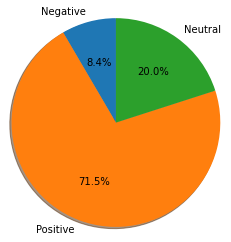

In [131]:
review_count=[neg_count, pos_count, neu_count]
labels=["Negative","Positive","Neutral"]
 
plt.pie(review_count, labels = labels, autopct = '%1.1f%%', shadow = True,radius=1.2,startangle=90)
plt.show()

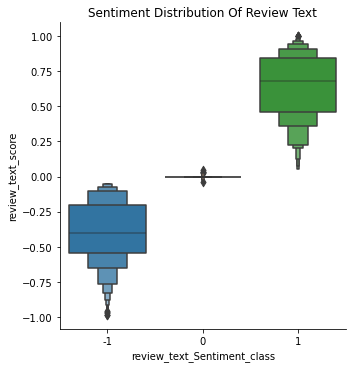

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x='review_text_Sentiment_class',y='review_text_score',kind='boxen',data=Review)
plt.title('Sentiment Distribution Of Review Text')
plt.show()

# Vader Sentiment analysis for title column using emoji

In [133]:
# Vader Sentiment analysis for title column
import emoji 
compound_val = []
sentiment_text = []
sentiment_class = []
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
for review in Review['title.adj']:
    
    v1 = analyzer.polarity_scores(review)
    score=v1['compound']
    compound_val.append(score)
    if score >= 0.05:
        sentiment_text.append(emoji.emojize('Positive :thumbs_up:\N{grinning face}'))
        sentiment_class.append(1)
    elif (score > -0.05) and (score < 0.05):
        sentiment_text.append(emoji.emojize('Neutral :zipper-mouth_face:'))
        sentiment_class.append(0)
    elif score <= -0.05:
        sentiment_text.append(emoji.emojize('Negative :thumbs_down:\N{disappointed face}'))
        sentiment_class.append(-1)
Review['Sentiment_Score_title'] = sentiment_text
Review['title_score'] = compound_val
Review['title_Sentiment_class'] = sentiment_class
Review[['title.adj','Sentiment_Score_title','title_score','title_Sentiment_class']]

,title.adj,Sentiment_Score_title,title_score,title_Sentiment_class
0,univers complet,Neutral 🤐,0.0000,0
1,hard,Negative 👎😞,-0.1027,-1
2,disappoint,Negative 👎😞,-0.4019,-1
3,,Neutral 🤐,0.0000,0
4,bourn,Neutral 🤐,0.0000,0
...,...,...,...,...
50899,,Neutral 🤐,0.0000,0
50900,univers,Neutral 🤐,0.0000,0
50901,impress,Positive 👍😀,0.4404,1
50902,small,Neutral 🤐,0.0000,0


# Summary statistics and visualization

In [134]:
Review.describe()

,rating,review_text_score,review_text_Sentiment_class,title_score,title_Sentiment_class
count,50859.000000,50859.000000,50859.00000,50859.000000,50859.000000
mean,4.257142,0.433201,0.63094,0.123175,0.226568
std,1.046513,0.411908,0.63366,0.249202,0.460357
min,1.000000,-0.985400,-1.00000,-0.888500,-1.000000
25%,4.000000,0.000000,0.00000,0.000000,0.000000
50%,5.000000,0.510600,1.00000,0.000000,0.000000
75%,5.000000,0.790600,1.00000,0.000000,0.000000
max,5.000000,0.998900,1.00000,0.954500,1.000000


In [135]:
neg_count=Review[Review['Sentiment_Score_title']== "Negative 👎😞"]['title.adj'].count()
pos_count=Review[Review['Sentiment_Score_title']== "Positive 👍😀"]['title.adj'].count()
neu_count=Review[Review['Sentiment_Score_title']== "Neutral 🤐"]['title.adj'].count()
print("Negative:", neg_count)
print("Positive:", pos_count)
print("Neutral:", neu_count)

Negative: 933
Positive: 12456
Neutral: 37470


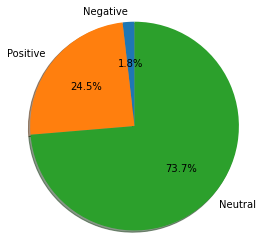

In [136]:
review_count=[neg_count, pos_count, neu_count]
labels=["Negative","Positive","Neutral"]
 
plt.pie(review_count, labels = labels, autopct = '%1.1f%%', shadow = True,radius=1.2,startangle=90)
plt.show()

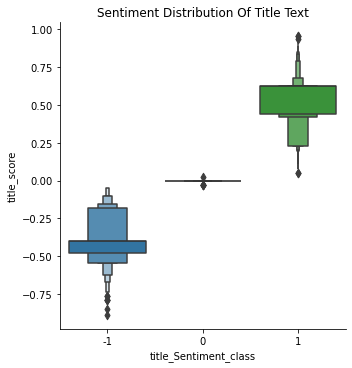

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x='title_Sentiment_class',y='title_score',kind='boxen',data=Review)
plt.title('Sentiment Distribution Of Title Text')
plt.show()

# Time Series Analysis

In [138]:
#Convert Date from str to Datetime
import datetime as dt

Review['Month_Year'] = Review['written_date'].dt.to_period('M')
Review['Year']= Review['written_date'].dt.to_period('Y')
Review.head()

,reviewer,rating,written_date,title,review_text,branch,review_text.adj,title.adj,Sentiment_Score_review_text,review_text_score,review_text_Sentiment_class,Sentiment_Score_title,title_score,title_Sentiment_class,Month_Year,Year
0,Kelly B,2,2021-05-30,universal complete disaster stick disney,went universal memorial day weekend total trai...,Universal Studios Florida,univers memori total prime wast extra sent app...,univers complet,Neutral 🤐,0.0000,0,Neutral 🤐,0.0000,0,2021-05,2021
1,Jon,1,2021-05-30,food hard get,food service horrible reviewing food wait time...,Universal Studios Florida,horribl minimum whole,hard,Neutral 🤐,0.0000,0,Negative 👎😞,-0.1027,-1,2021-05,2021
2,Nerdy P,2,2021-05-30,disappointed,booked vacation mainly ride hagrid motorcycle ...,Universal Studios Florida,hagrid disappoint find virtual entir messag vi...,disappoint,Positive 👍😀,0.5859,1,Negative 👎😞,-0.4019,-1,2021-05,2021
3,ran101278,4,2021-05-29,opinion,person tries test seat rides gets green light ...,Universal Studios Florida,green long ride actual express,,Neutral 🤐,0.0000,0,Neutral 🤐,0.0000,0,2021-05,2021
4,tammies20132015,5,2021-05-28,bourne stuntacularmust see,ok stress enough anyone everyone go universal ...,Universal Studios Florida,ok univers make sure see bourn stuntaculari en...,bourn,Positive 👍😀,0.1027,1,Neutral 🤐,0.0000,0,2021-05,2021


In [139]:
df_year = Review.loc[:,['Month_Year','Year','Sentiment_Score_review_text','Sentiment_Score_title']]
df_year['Sentiment_Score_review_text']=df_year['Sentiment_Score_review_text'].str.split(' ').str[0]
df_year['Sentiment_Score_title']=df_year['Sentiment_Score_title'].str.split(' ').str[0]
df_year.head()

,Month_Year,Year,Sentiment_Score_review_text,Sentiment_Score_title
0,2021-05,2021,Neutral,Neutral
1,2021-05,2021,Neutral,Negative
2,2021-05,2021,Positive,Negative
3,2021-05,2021,Neutral,Neutral
4,2021-05,2021,Positive,Neutral


<AxesSubplot:xlabel='Year'>

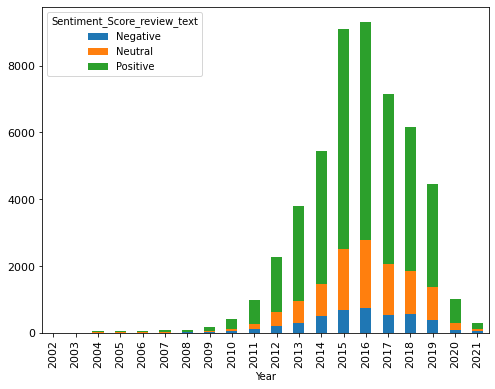

In [140]:
df_year.groupby(['Year','Sentiment_Score_review_text']).size().unstack().plot(kind='bar', fontsize=11, figsize=(8,6), stacked=True)

<AxesSubplot:xlabel='Year'>

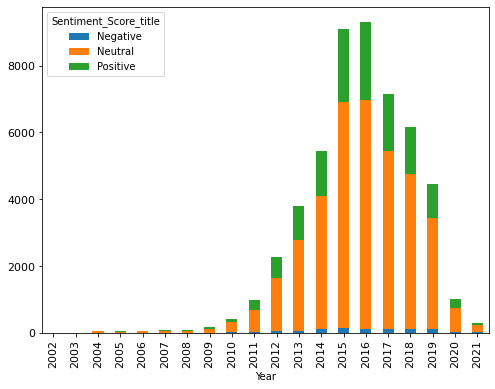

In [141]:
df_year.groupby(['Year','Sentiment_Score_title']).size().unstack().plot(kind='bar', fontsize=11, figsize=(8,6), stacked=True)

In [142]:
ts_review=Review.drop(['reviewer','title','branch','title.adj','review_text','Sentiment_Score_title','title_score','title_Sentiment_class','review_text_score','review_text_Sentiment_class','Month_Year'],axis=1)

In [143]:
ts_review

,rating,written_date,review_text.adj,Sentiment_Score_review_text,Year
0,2,2021-05-30,univers memori total prime wast extra sent app...,Neutral 🤐,2021
1,1,2021-05-30,horribl minimum whole,Neutral 🤐,2021
2,2,2021-05-30,hagrid disappoint find virtual entir messag vi...,Positive 👍😀,2021
3,4,2021-05-29,green long ride actual express,Neutral 🤐,2021
4,5,2021-05-28,ok univers make sure see bourn stuntaculari en...,Positive 👍😀,2021
...,...,...,...,...,...
50899,4,2010-03-29,univers park friday soft gener avail onlin gen...,Positive 👍😀,2010
50900,4,2010-03-29,first univers doubl due technic egypt son due ...,Negative 👎😞,2010
50901,4,2010-03-28,first dual main due major long open earli foun...,Positive 👍😀,2010
50902,4,2010-03-22,isoft major nonexist upto park compact tini sh...,Positive 👍😀,2010


In [144]:
ts_review['written_date'] = pd.to_datetime(ts_review['written_date'])
ts_review['Month'] = ts_review['written_date'].dt.month

In [145]:
ts_review.head()

,rating,written_date,review_text.adj,Sentiment_Score_review_text,Year,Month
0,2,2021-05-30,univers memori total prime wast extra sent app...,Neutral 🤐,2021,5
1,1,2021-05-30,horribl minimum whole,Neutral 🤐,2021,5
2,2,2021-05-30,hagrid disappoint find virtual entir messag vi...,Positive 👍😀,2021,5
3,4,2021-05-29,green long ride actual express,Neutral 🤐,2021,5
4,5,2021-05-28,ok univers make sure see bourn stuntaculari en...,Positive 👍😀,2021,5


In [146]:
ts_review_pos=ts_review.loc[ts_review['Sentiment_Score_review_text']=='Positive 👍😀']
ts_review_neg=ts_review.loc[ts_review['Sentiment_Score_review_text']=='Negative 👎😞']
print(ts_review_pos)

       rating written_date                                    review_text.adj  \
2           2   2021-05-30  hagrid disappoint find virtual entir messag vi...   
4           5   2021-05-28  ok univers make sure see bourn stuntaculari en...   
5           1   2021-05-28     outdat whole super camp super disrespect uncar   
6           2   2021-05-27                                    want bunch last   
7           2   2021-05-27  disappoint onsit hard fast fresh dirti pleasan...   
...       ...          ...                                                ...   
50898       4   2010-04-06  univers public first due crowd earli turnstil ...   
50899       4   2010-03-29  univers park friday soft gener avail onlin gen...   
50901       4   2010-03-28  first dual main due major long open earli foun...   
50902       4   2010-03-22  isoft major nonexist upto park compact tini sh...   
50903       5   2010-02-24  get februari sneak adult combo good feb ispac ...   

      Sentiment_Score_revie

In [147]:
month_pos_reviewed = ts_review_pos['Month']

number_of_pos_review = month_pos_reviewed.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_pos_review = pd.DataFrame(number_of_pos_review)
number_of_pos_review['month'] = months
number_of_pos_review.rename(columns = {'Month':'number_of_positive_reviewed'},inplace=True)
print(number_of_pos_review)

    number_of_positive_reviewed month
1                          3184   Jan
2                          2283   Feb
3                          2793   Mar
4                          3217   Apr
5                          2812   May
6                          3050   Jun
7                          3820   Jul
8                          3539   Aug
9                          2941   Sep
10                         3342   Oct
11                         2709   Nov
12                         2688   Dec


<AxesSubplot:xlabel='month'>

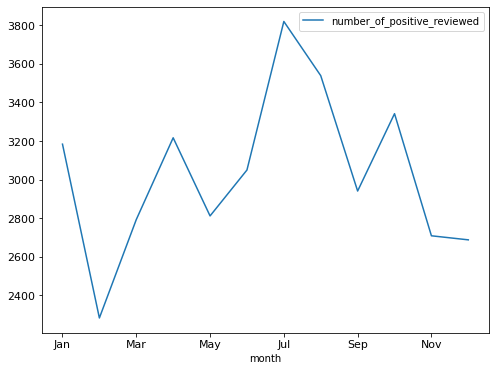

In [148]:
number_of_pos_review.plot(x='month',kind='line',fontsize = 11,figsize=(8,6))

In [149]:
month_neg_reviewed = ts_review_neg['Month']

number_of_neg_review = month_neg_reviewed.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_neg_review = pd.DataFrame(number_of_neg_review)
number_of_neg_review['month'] = months
number_of_neg_review.rename(columns = {'Month':'number_of_negative_reviewed'},inplace=True)
print(number_of_neg_review)

    number_of_negative_reviewed month
1                           413   Jan
2                           284   Feb
3                           311   Mar
4                           367   Apr
5                           302   May
6                           330   Jun
7                           386   Jul
8                           428   Aug
9                           318   Sep
10                          472   Oct
11                          323   Nov
12                          355   Dec


<AxesSubplot:xlabel='month'>

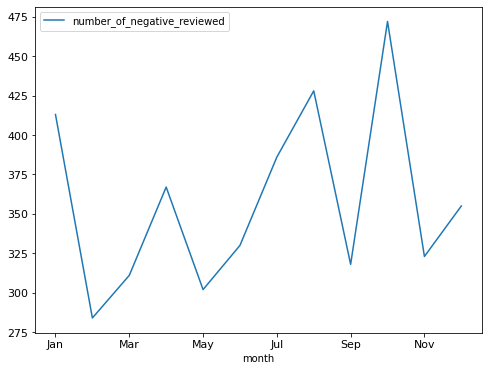

In [150]:
number_of_neg_review.plot(x='month',kind='line',fontsize = 11,figsize=(8,6))

# Top 5 words in reviews Title column

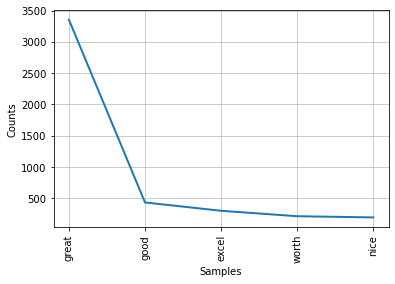

Top 5 frequent Positive words:  [('great', 3354), ('good', 433), ('excel', 300), ('worth', 213), ('nice', 194)]


In [151]:
fdist = Review[Review['Sentiment_Score_title']=='Positive 👍😀'][Review['rating']>4]
lists =  fdist['title.adj']
    
fdist=nltk.FreqDist(lists) 
top5=fdist.most_common(5)
top_5 = nltk.FreqDist(dict(fdist.most_common(5)))
top_5.plot()

print("Top 5 frequent Positive words: ",top5)

# Convert to string for WordCloud
for i in range(len(fdist)):
    freq =' '.join([x for x,y in top5])

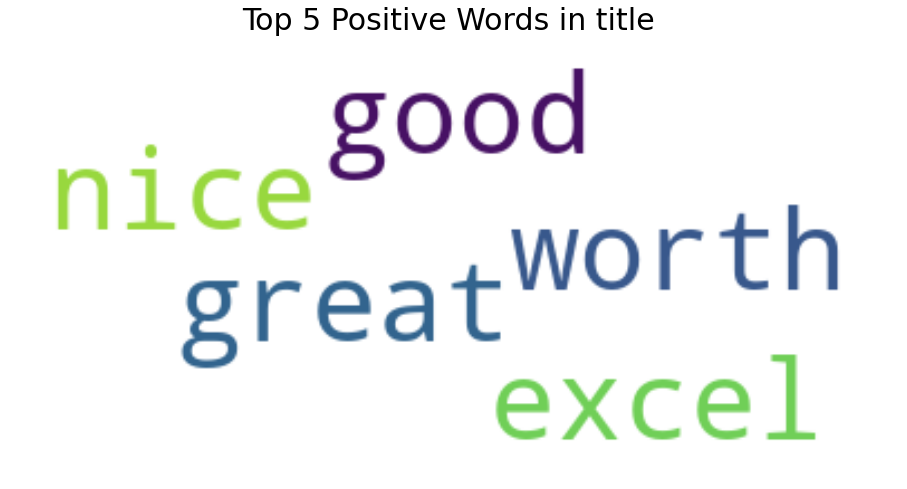

In [152]:
# Top 5 pos words in reviews title column
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color = 'white', max_font_size = 50, max_words = 20).generate(freq)
plt.figure(figsize = (16,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.title('Top 5 Positive Words in title ', fontsize = 30)                                                                                            
plt.axis("off")
plt.show()

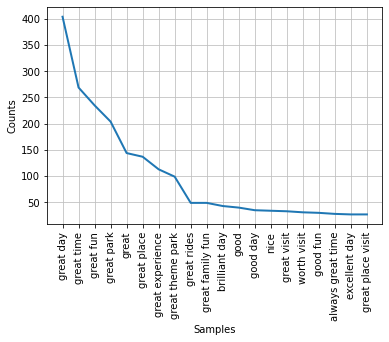

Top 5 frequent Positive words:  [('great day', 404), ('great time', 269), ('great fun', 235), ('great park', 204), ('great', 144), ('great place', 137), ('great experience', 113), ('great theme park', 99), ('great rides', 49), ('great family fun', 49), ('brilliant day', 43), ('good', 40), ('good day', 35), ('nice', 34), ('great visit', 33), ('worth visit', 31), ('good fun', 30), ('always great time', 28), ('excellent day', 27), ('great place visit', 27)]


In [153]:
fdist = Review[Review['Sentiment_Score_title']=='Positive 👍😀'][Review['rating']>4]
lists =  fdist['title']
    
fdist=nltk.FreqDist(lists) 
top5=fdist.most_common(20)
top_5 = nltk.FreqDist(dict(fdist.most_common(20)))
top_5.plot()

print("Top 5 frequent Positive words: ",top5)

# Convert to string for WordCloud
for i in range(len(fdist)):
    freq =' '.join([x for x,y in top5])

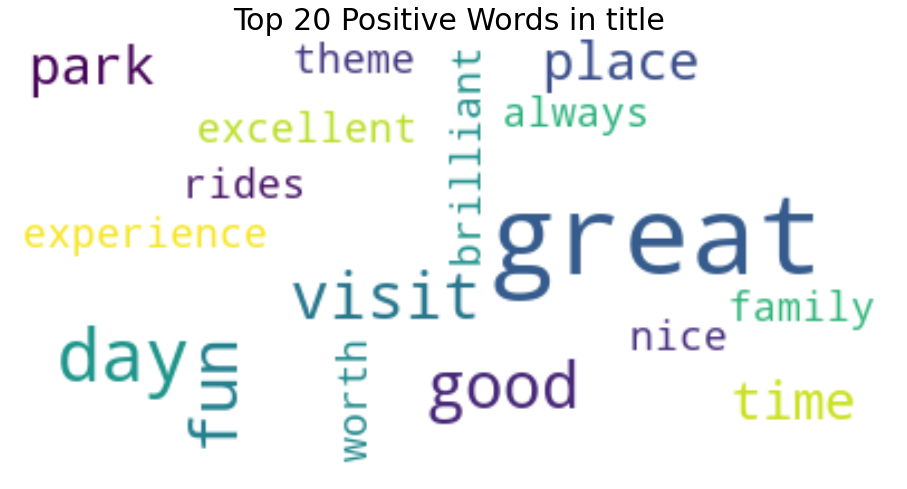

In [154]:
# Top 5 pos words in reviews title column
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color = 'white', max_font_size = 50, max_words = 20).generate(freq)
plt.figure(figsize = (16,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.title('Top 20 Positive Words in title ', fontsize = 30)                                                                                            
plt.axis("off")
plt.show()

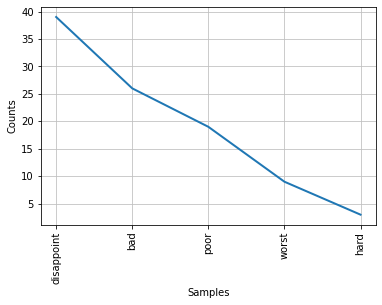

Top 20 frequent Neg words from the paragraph:  [('disappoint', 39), ('bad', 26), ('poor', 19), ('worst', 9), ('hard', 3)]


In [155]:
fdist = Review[Review['Sentiment_Score_title']=='Negative 👎😞'][Review['rating']<2]
lists =  fdist['title.adj']
    
fdist=nltk.FreqDist(lists) 
top20=fdist.most_common(5)
top_20 = nltk.FreqDist(dict(fdist.most_common(5)))
top_20.plot()

print("Top 20 frequent Neg words from the paragraph: ",top20)

# Convert to string for WordCloud
for i in range(len(fdist)):
    freq =' '.join([x for x,y in top20])

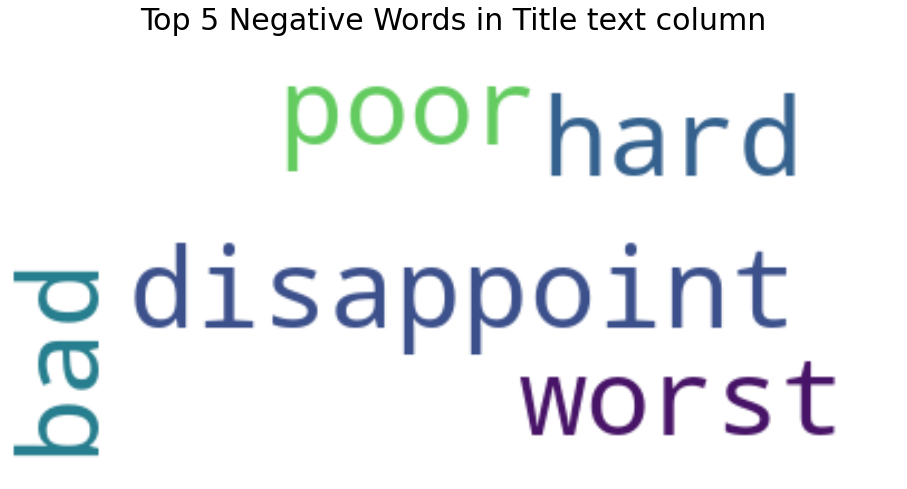

In [54]:
# Top 5 neg words in reviews title column
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color = 'white', max_font_size = 50, max_words = 20).generate(freq)
plt.figure(figsize = (16,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.title('Top 5 Negative Words in Title text column', fontsize = 30)                                                                                            
plt.axis("off")
plt.show()

# Applying Text Classification Algorithms from Positive and Negative reviews

In [55]:
Review.head()

,reviewer,rating,written_date,title,review_text,branch,review_text.adj,title.adj,Sentiment_Score_review_text,review_text_score,review_text_Sentiment_class,Sentiment_Score_title,title_score,title_Sentiment_class,Month_Year,Year
0,Kelly B,2,2021-05-30,universal complete disaster stick disney,went universal memorial day weekend total trai...,Universal Studios Florida,univers memori total prime wast extra sent app...,univers complet,Neutral 🤐,0.0000,0,Neutral 🤐,0.0000,0,2021-05,2021
1,Jon,1,2021-05-30,food hard get,food service horrible reviewing food wait time...,Universal Studios Florida,horribl minimum whole,hard,Neutral 🤐,0.0000,0,Negative 👎😞,-0.1027,-1,2021-05,2021
2,Nerdy P,2,2021-05-30,disappointed,booked vacation mainly ride hagrid motorcycle ...,Universal Studios Florida,hagrid disappoint find virtual entir messag vi...,disappoint,Positive 👍😀,0.5859,1,Negative 👎😞,-0.4019,-1,2021-05,2021
3,ran101278,4,2021-05-29,opinion,person tries test seat rides gets green light ...,Universal Studios Florida,green long ride actual express,,Neutral 🤐,0.0000,0,Neutral 🤐,0.0000,0,2021-05,2021
4,tammies20132015,5,2021-05-28,bourne stuntacularmust see,ok stress enough anyone everyone go universal ...,Universal Studios Florida,ok univers make sure see bourn stuntaculari en...,bourn,Positive 👍😀,0.1027,1,Neutral 🤐,0.0000,0,2021-05,2021


In [56]:
df_model = Review.loc[:,['review_text','Sentiment_Score_review_text']]
df_model['Sentiment_Score_review_text']=df_model['Sentiment_Score_review_text'].str.split(' ').str[0]
df_model.head()

,review_text,Sentiment_Score_review_text
0,went universal memorial day weekend total trai...,Neutral
1,food service horrible reviewing food wait time...,Neutral
2,booked vacation mainly ride hagrid motorcycle ...,Positive
3,person tries test seat rides gets green light ...,Neutral
4,ok stress enough anyone everyone go universal ...,Positive


In [57]:
df_model.loc[df_model["Sentiment_Score_review_text"]=='Positive',"Sentiment_Score_review_text"]=1
df_model.loc[df_model["Sentiment_Score_review_text"]=='Negative',"Sentiment_Score_review_text"]=0
df_model.loc[df_model["Sentiment_Score_review_text"]=='Neutral',"Sentiment_Score_review_text"]=0
df_model.head()

,review_text,Sentiment_Score_review_text
0,went universal memorial day weekend total trai...,0
1,food service horrible reviewing food wait time...,0
2,booked vacation mainly ride hagrid motorcycle ...,1
3,person tries test seat rides gets green light ...,0
4,ok stress enough anyone everyone go universal ...,1


In [58]:
# Training the classifier, predicting on test data & evaluating performance with classification metrics

# Spliting into X & y
X = df_model.iloc[:, 0].values
y = df_model.iloc[:, 1].values

In [59]:
X=X.astype(str)
X.shape
#len(X)
X

array(['went universal memorial day weekend total train wreck waited get parking lot forty minutes paid prime parking make wasted time paid extra express pass tickets turned away sent guest services bc app show bar code line guest services took forever clearly understaffed sent yet another guest services line express passes also took ages spent nearly hours trying enter park shared jackie guest services smirked even apologize patronizing would never happen disney inside several rides work reopened backed express line rides still full hour wait two hours without express pass also saw people jump sneak express lanes convince workers let check point worked felt like complete suckers paying express pass still left us long lines people pay could sneak long lines buy water use restroom get butter beer sucked horrible day avoid place total disaster',
       'food service horrible reviewing food wait time minutes minimum get one cashier working place ruins whole experience closed cash register

In [60]:
y=y.astype('int')
y

array([0, 0, 1, ..., 1, 1, 1])

In [61]:
# import stopwords from word cloud
from wordcloud import STOPWORDS

# importing Term Frequency Extraction form sklearn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# stopwords removing Not 
stopwords = set(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(stop_words=stopwords , ngram_range=(1,2))

tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(X)        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_new_counts = count_vect.transform(X)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

In [62]:
prediction={}
from sklearn.naive_bayes import BernoulliNB
#fitting the bernouli Naive Bayes
model_BNB = BernoulliNB().fit(X_train_tfidf,y)
prediction['Bernoulli'] = model_BNB.predict_proba(X_test_tfidf)[:,1]
acc= model_BNB.score(X_test_tfidf , y)
print("Bernoulli Accuracy : "+str(acc*100),"%")

Bernoulli Accuracy : 86.31117403016182 %


In [63]:
from sklearn import linear_model
logistic_reg = linear_model.LogisticRegression()
logistic = logistic_reg.fit(X_train_tfidf, y)
prediction['LogisticRegression'] = logistic_reg.predict_proba(X_test_tfidf)[:,1]
acc=logistic_reg.score(X_test_tfidf , y)
print("Logistic Regression Accuracy : "+str(acc*100),"%")

Logistic Regression Accuracy : 94.5083466053206 %


# TFIDF _Feature Extraction - Universal Studio Florida

In [64]:
Review.head()

,reviewer,rating,written_date,title,review_text,branch,review_text.adj,title.adj,Sentiment_Score_review_text,review_text_score,review_text_Sentiment_class,Sentiment_Score_title,title_score,title_Sentiment_class,Month_Year,Year
0,Kelly B,2,2021-05-30,universal complete disaster stick disney,went universal memorial day weekend total trai...,Universal Studios Florida,univers memori total prime wast extra sent app...,univers complet,Neutral 🤐,0.0000,0,Neutral 🤐,0.0000,0,2021-05,2021
1,Jon,1,2021-05-30,food hard get,food service horrible reviewing food wait time...,Universal Studios Florida,horribl minimum whole,hard,Neutral 🤐,0.0000,0,Negative 👎😞,-0.1027,-1,2021-05,2021
2,Nerdy P,2,2021-05-30,disappointed,booked vacation mainly ride hagrid motorcycle ...,Universal Studios Florida,hagrid disappoint find virtual entir messag vi...,disappoint,Positive 👍😀,0.5859,1,Negative 👎😞,-0.4019,-1,2021-05,2021
3,ran101278,4,2021-05-29,opinion,person tries test seat rides gets green light ...,Universal Studios Florida,green long ride actual express,,Neutral 🤐,0.0000,0,Neutral 🤐,0.0000,0,2021-05,2021
4,tammies20132015,5,2021-05-28,bourne stuntacularmust see,ok stress enough anyone everyone go universal ...,Universal Studios Florida,ok univers make sure see bourn stuntaculari en...,bourn,Positive 👍😀,0.1027,1,Neutral 🤐,0.0000,0,2021-05,2021


In [65]:
df_tfidf_florida = Review.loc[(Review['branch'] == 'Universal Studios Florida') & (Review['rating'] < 3) & (Review['Sentiment_Score_review_text'] == 'Negative 👎😞')]

text_list = df_tfidf_florida['review_text'].tolist()
df_tfidf_florida.head()

,reviewer,rating,written_date,title,review_text,branch,review_text.adj,title.adj,Sentiment_Score_review_text,review_text_score,review_text_Sentiment_class,Sentiment_Score_title,title_score,title_Sentiment_class,Month_Year,Year
12,Kate Z,2,2021-05-25,crowded unhelpful staff difficult get foodwater,disney tell much returned one day visit univer...,Universal Studios Florida,univers prior endless coupl earli wait earli a...,unhelp difficult,Negative 👎😞,-0.7717,-1,Negative 👎😞,-0.3612,-1,2021-05,2021
13,Kimberly T,1,2021-05-24,parking guest services terrible,went city walk due quadriplegic son nothing ch...,Universal Studios Florida,due access scari young guy total park long fil...,terribl,Negative 👎😞,-0.8360,-1,Neutral 🤐,0.0000,0,2021-05,2021
17,khali m,1,2021-05-19,awful,rude workers yelled tons people multiple rides...,Universal Studios Florida,rude downveri,,Negative 👎😞,-0.4588,-1,Neutral 🤐,0.0000,0,2021-05,2021
20,Okp1245,2,2021-05-19,rides close often,went universal class field trip sucked rides b...,Universal Studios Florida,univers break abl big red hard stuck fast top ...,,Negative 👎😞,-0.2023,-1,Neutral 🤐,0.0000,0,2021-05,2021
21,kanukgirl0,2,2021-05-18,money money money rich mns world,universal studios three theme parks universal ...,Universal Studios Florida,univers univers mani worth nd poor univers rid...,rich,Negative 👎😞,-0.4588,-1,Positive 👍😀,0.5574,1,2021-05,2021


In [66]:
# Building a TF IDF matrix out of the corpus of reviews
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Getting bigrams 
vectorizer = CountVectorizer(ngram_range =(2, 2))
X1 = vectorizer.fit_transform(text_list) 
features = (vectorizer.get_feature_names())
#print("\n\nFeatures : \n", features)
print("\n\nX1 : \n", X1.toarray())

# Applying TFIDF
td = TfidfVectorizer(ngram_range = (2,2))
X2 = td.fit_transform(text_list)
scores = (X2.toarray())
print("\n\nScores : \n", scores)

# Getting top ranking features
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0, col] ))
    
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(10))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words head : 
                     term       rank
19254       harry potter  12.070567
48782  universal studios   9.209780
14190       express pass   7.456534
8812    customer service   5.749775
14829          fast pass   4.939193
29489            one day   4.110785
21735  islands adventure   3.896256
45263         theme park   3.712837
24807         long lines   3.612724
50966         waste time   3.555596


<AxesSubplot:ylabel='term'>

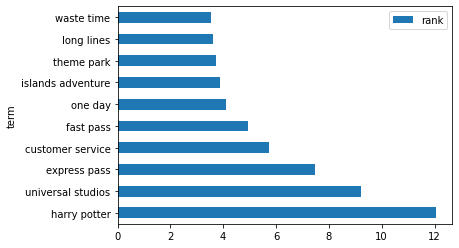

In [67]:
words.iloc[0:10].plot(x='term',y='rank',kind='barh')

In [68]:
# Building a TF IDF matrix out of the corpus of reviews
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Getting trigrams 
vectorizer = CountVectorizer(ngram_range =(3, 3))
X1 = vectorizer.fit_transform(text_list) 
features = (vectorizer.get_feature_names())
#print("\n\nFeatures : \n", features)
print("\n\nX1 : \n", X1.toarray())

# Applying TFIDF
td = TfidfVectorizer(ngram_range = (3,3))
X2 = td.fit_transform(text_list)
scores = (X2.toarray())
print("\n\nScores : \n", scores)

# Getting top ranking features
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0, col] ))
    
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(10))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words head : 
                                  term      rank
23865               harry potter ride  2.444743
23866              harry potter rides  1.792649
23401         halloween horror nights  1.650546
23782               harry potter area  1.630857
23907              harry potter world  1.581452
61277       universal studios orlando  1.554659
64379                waste time money  1.515222
12392  disappointed universal studios  1.317154
35287                   never go back  1.299286
42679           poor customer service  1.145151


<AxesSubplot:ylabel='term'>

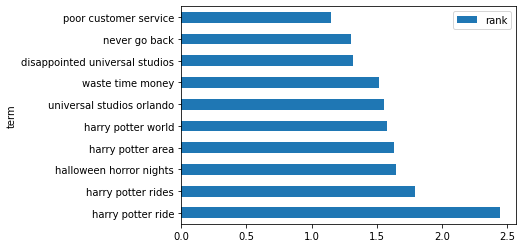

In [69]:
words.iloc[0:10].plot(x='term',y='rank',kind='barh')

# TFIDF - Feature Extraction - Universal Studios Japan

In [70]:
df_tfidf_japan = Review.loc[(Review['branch'] == 'Universal Studios Japan') & (Review['rating'] < 3) & (Review['Sentiment_Score_review_text'] == 'Negative 👎😞')]

text_list = df_tfidf_japan['review_text'].tolist()

#drop chinese words
#df_tfidf_japan=df_tfidf_japan.drop(df_tfidf_japan.index[[0]])
df_tfidf_japan.head()

,reviewer,rating,written_date,title,review_text,branch,review_text.adj,title.adj,Sentiment_Score_review_text,review_text_score,review_text_Sentiment_class,Sentiment_Score_title,title_score,title_Sentiment_class,Month_Year,Year
30780,Janelle,1,2019-11-01,traumatic experience,exchange student friends decided come hallowee...,Universal Studios Japan,come halloween bad come traumat chucki scari e...,traumat,Negative 👎😞,-0.5719,-1,Neutral 🤐,0.0,0,2019-11,2019
30789,GTLaz,1,2019-10-29,understood nothing,awful decision almost everything like instruct...,Universal Studios Japan,aw japanes worst japanes,,Negative 👎😞,-0.6249,-1,Neutral 🤐,0.0,0,2019-10,2019
30829,prince_of_roam,2,2019-10-06,harry potter world bit rated,vr ride got nauseaus im getting old type rides...,Universal Studios Japan,nauseau old sick,,Negative 👎😞,-0.5106,-1,Neutral 🤐,0.0,0,2019-10,2019
30978,Angela T,1,2019-05-21,disappointment usj staff,today alone brought years old son usj bit exci...,Universal Studios Japan,old usj first big big top sudden abl insid und...,usj,Negative 👎😞,-0.2263,-1,Neutral 🤐,0.0,0,2019-05,2019
31006,renodc,2,2019-04-29,foreigner friendly lack things,starters looking park rides probably log flume...,Universal Studios Japan,log japanes hard park small much half bad solo...,friendli,Negative 👎😞,-0.0772,-1,Neutral 🤐,0.0,0,2019-04,2019


In [71]:
# Building a TF IDF matrix out of the corpus of reviews
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Getting bigrams 
vectorizer = CountVectorizer(ngram_range =(2,2))
X1 = vectorizer.fit_transform(text_list) 
features = (vectorizer.get_feature_names())
#print("\n\nFeatures : \n", features)
print("\n\nX1 : \n", X1.toarray())

# Applying TFIDF
td = TfidfVectorizer(ngram_range = (2,2))
X2 = td.fit_transform(text_list)
scores = (X2.toarray())
print("\n\nScores : \n", scores)

# Getting top ranking features
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0, col] ))
    
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(10))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words head : 
                    term      rank
1992       harry potter  2.445254
1480       express pass  1.893118
4978  universal studios  1.502837
4617         theme park  1.054294
5183       waiting time  0.955924
3556       potter world  0.943614
1524          fast pass  0.901567
2740        many people  0.886564
5226        waste money  0.818488
1481     express passes  0.796183


<AxesSubplot:ylabel='term'>

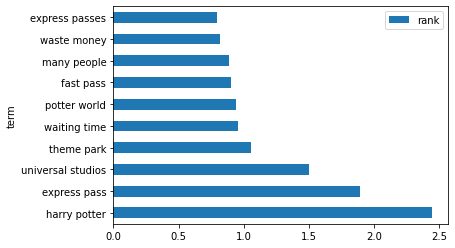

In [72]:
words.iloc[0:10].plot(x='term',y='rank',kind='barh')

In [73]:
# Building a TF IDF matrix out of the corpus of reviews
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Getting trigrams 
vectorizer = CountVectorizer(ngram_range =(3,3))
X1 = vectorizer.fit_transform(text_list) 
features = (vectorizer.get_feature_names())
#print("\n\nFeatures : \n", features)
print("\n\nX1 : \n", X1.toarray())

# Applying TFIDF
td = TfidfVectorizer(ngram_range = (3,3))
X2 = td.fit_transform(text_list)
scores = (X2.toarray())
print("\n\nScores : \n", scores)

# Getting top ranking features
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0, col] ))
    
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(10))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words head : 
                             term      rank
2182          harry potter world  0.929036
2155           harry potter area  0.542689
633             buy express pass  0.486137
2170           harry potter ride  0.465090
1895               get fast pass  0.413007
1622               fast pass day  0.365664
1562           express pass sold  0.361276
4623  skipping queues everywhere  0.353553
3721      people skipping queues  0.353553
817     compared orlando florida  0.353553


<AxesSubplot:ylabel='term'>

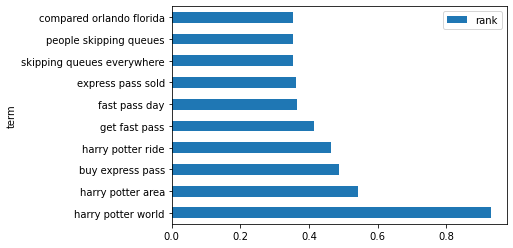

In [74]:
words.iloc[0:10].plot(x='term',y='rank',kind='barh')

# TFIDF - Feature Extraction - Universal Studios Singapore

In [75]:
df_tfidf_singapore = Review.loc[(Review['branch'] == 'Universal Studios Singapore') & (Review['rating'] < 3) & (Review['Sentiment_Score_review_text'] == 'Negative 👎😞')]

text_list = df_tfidf_singapore['review_text'].tolist()
df_tfidf_singapore.head()

,reviewer,rating,written_date,title,review_text,branch,review_text.adj,title.adj,Sentiment_Score_review_text,review_text_score,review_text_Sentiment_class,Sentiment_Score_title,title_score,title_Sentiment_class,Month_Year,Year
35162,Ebin I,1,2021-03-19,terrible enjoy day long queue cancelled shows ...,terrible enjoy single moment know say crowd co...,Universal Studios Singapore,terribl singl covid multipl queue covid bad wrong,terribl,Negative 👎😞,-0.7650,-1,Neutral 🤐,0.0,0,2021-03,2021
35177,Lim Boon hee,1,2021-01-02,go monsoon season,enough shelters rain even shelters leaks wait ...,Universal Studios Singapore,enough horrend whole compens firework bore,,Negative 👎😞,-0.2500,-1,Neutral 🤐,0.0,0,2021-01,2021
35188,Lovetravelling275,1,2020-12-12,waste time money,visited park december waste time truly regret ...,Universal Studios Singapore,regret uss limit pm control abl conduc queue u...,,Negative 👎😞,-0.4215,-1,Neutral 🤐,0.0,0,2020-12,2020
35198,Eatsleeprepeat86,2,2020-11-10,long waiting times,love go theme parks universal studios singapor...,Universal Studios Singapore,univers need hard expensivecrazi halloween hal...,,Negative 👎😞,-0.2023,-1,Neutral 🤐,0.0,0,2020-11,2020
35201,CMSHS,1,2020-09-27,disappointing,takes hour half enter place know things arent ...,Universal Studios Singapore,enter arent great park univers endless,,Negative 👎😞,-0.5096,-1,Neutral 🤐,0.0,0,2020-09,2020


In [76]:
# Building a TF IDF matrix out of the corpus of reviews
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Getting trigrams 
vectorizer = CountVectorizer(ngram_range =(2,2))
X1 = vectorizer.fit_transform(text_list) 
features = (vectorizer.get_feature_names())
#print("\n\nFeatures : \n", features)
print("\n\nX1 : \n", X1.toarray())

# Applying TFIDF
td = TfidfVectorizer(ngram_range = (2,2))
X2 = td.fit_transform(text_list)
scores = (X2.toarray())
print("\n\nScores : \n", scores)

# Getting top ranking features
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0, col] ))
    
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(10))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words head : 
                     term      rank
13444  universal studios  3.680535
3813        express pass  3.547306
12448         theme park  2.873061
12449        theme parks  1.977143
13443   universal studio  1.912959
14024       waiting time  1.910741
10566     roller coaster  1.849672
13959          wait time  1.599160
12150  studios singapore  1.475572
3822      express ticket  1.360343


<AxesSubplot:ylabel='term'>

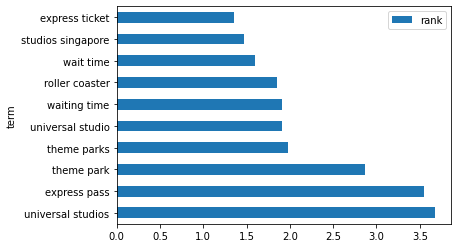

In [77]:
words.iloc[0:10].plot(x='term',y='rank',kind='barh')

In [78]:
# Building a TF IDF matrix out of the corpus of reviews
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Getting trigrams 
vectorizer = CountVectorizer(ngram_range =(3,3))
X1 = vectorizer.fit_transform(text_list) 
features = (vectorizer.get_feature_names())
#print("\n\nFeatures : \n", features)
print("\n\nX1 : \n", X1.toarray())

# Applying TFIDF
td = TfidfVectorizer(ngram_range = (3,3))
X2 = td.fit_transform(text_list)
scores = (X2.toarray())
print("\n\nScores : \n", scores)

# Getting top ranking features
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0, col] ))
    
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(10))



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words head : 
                               term      rank
15150  universal studios singapore  1.443453
15111   universal studio singapore  0.813134
11763           rides waiting time  0.648623
1495              buy express pass  0.640938
16016             waste time money  0.622134
6526            jurassic park ride  0.531035
15608    visited universal studios  0.526439
10771          queues poor service  0.511157
13544            studio theme park  0.438087
15113       universal studio theme  0.438087


<AxesSubplot:ylabel='term'>

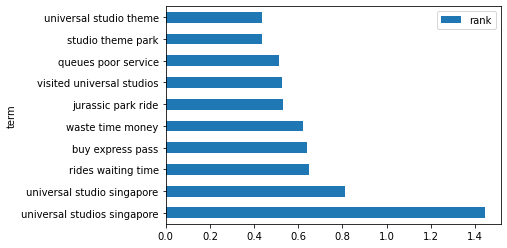

In [79]:
words.iloc[0:10].plot(x='term',y='rank',kind='barh')

# Stemming - Topic modeling

In [80]:
from nltk.stem import PorterStemmer

In [81]:
tm=Review['review_text']
print(tm)

0        went universal memorial day weekend total trai...
1        food service horrible reviewing food wait time...
2        booked vacation mainly ride hagrid motorcycle ...
3        person tries test seat rides gets green light ...
4        ok stress enough anyone everyone go universal ...
                               ...                        
50899    first visit universal studio theme park went p...
50900    finally visited singapore first theme park uni...
50901    visited first week isoft opening unfortunately...
50902    visited day isoft opening ticket sales limited...
50903    group managed get tickets february sneak previ...
Name: review_text, Length: 50859, dtype: object


In [82]:
def clean(text):
    wordlist=nltk.word_tokenize(text)
    ps=nltk.stem.PorterStemmer()
    result=[ps.stem(i) for i in wordlist]
    return result

In [83]:
cleandocs=[clean(x) for x in tm]

In [84]:
print(cleandocs[0])

['went', 'univers', 'memori', 'day', 'weekend', 'total', 'train', 'wreck', 'wait', 'get', 'park', 'lot', 'forti', 'minut', 'paid', 'prime', 'park', 'make', 'wast', 'time', 'paid', 'extra', 'express', 'pass', 'ticket', 'turn', 'away', 'sent', 'guest', 'servic', 'bc', 'app', 'show', 'bar', 'code', 'line', 'guest', 'servic', 'took', 'forev', 'clearli', 'understaf', 'sent', 'yet', 'anoth', 'guest', 'servic', 'line', 'express', 'pass', 'also', 'took', 'age', 'spent', 'nearli', 'hour', 'tri', 'enter', 'park', 'share', 'jacki', 'guest', 'servic', 'smirk', 'even', 'apolog', 'patron', 'would', 'never', 'happen', 'disney', 'insid', 'sever', 'ride', 'work', 'reopen', 'back', 'express', 'line', 'ride', 'still', 'full', 'hour', 'wait', 'two', 'hour', 'without', 'express', 'pass', 'also', 'saw', 'peopl', 'jump', 'sneak', 'express', 'lane', 'convinc', 'worker', 'let', 'check', 'point', 'work', 'felt', 'like', 'complet', 'sucker', 'pay', 'express', 'pass', 'still', 'left', 'us', 'long', 'line', 'peopl

In [85]:
import gensim
word_dict=gensim.corpora.Dictionary(cleandocs)

In [86]:
# Convert to a bag of words.
doc_term_matrix=[word_dict.doc2bow(i) for i in cleandocs]


In [87]:
# Generate the LDA model
Lda=gensim.models.ldamodel.LdaModel

In [88]:
# Running and Training LDA model on the document term matrix. Set number of topics =10.
ldamodel=Lda(doc_term_matrix, num_topics=10,id2word=word_dict)

In [89]:
print(ldamodel.print_topics(num_topics=0,num_words=3))

[(4, '0.029*"univers" + 0.027*"food" + 0.022*"studio"'), (7, '0.042*"ride" + 0.028*"pass" + 0.028*"day"'), (2, '0.041*"ride" + 0.023*"day" + 0.023*"visit"'), (0, '0.017*"ride" + 0.015*"waterworld" + 0.012*"univers"'), (5, '0.041*"ride" + 0.038*"wait" + 0.030*"time"'), (3, '0.057*"ride" + 0.038*"singapor" + 0.023*"coaster"'), (9, '0.045*"zone" + 0.036*"ancient" + 0.028*"night"'), (6, '0.074*"ride" + 0.042*"mummi" + 0.040*"transform"'), (8, '0.016*"get" + 0.016*"water" + 0.015*"take"'), (1, '0.074*"uss" + 0.027*"photo" + 0.022*"tour"')]


In [90]:
# The most important words in topic 0 is ride, park, and day.

In [91]:
import re
def topic_summary(topic_id):
    topic_string=ldamodel.print_topics(num_topics=-1, num_words=len(word_dict))[topic_id][1]
    weight=re.findall("\d\.\d{3}",topic_string)
    word=re.findall('"(.*?)"',topic_string)
    result={k:float(v) for k,v in zip(word,weight)}
    return result

In [92]:
print(sum(topic_summary(1).values()))

0.8110000000000005


In [93]:
print(ldamodel.get_topics())

[[1.7723576e-04 2.0593957e-03 2.4852895e-03 ... 3.7061841e-07
  3.7061841e-07 3.7061841e-07]
 [8.5233405e-05 4.9847146e-03 1.0843507e-03 ... 1.3178973e-06
  1.3178973e-06 1.3178973e-06]
 [6.6214954e-03 4.5053214e-03 3.0909394e-04 ... 1.7415744e-07
  1.7415744e-07 1.7415744e-07]
 ...
 [4.5683229e-04 5.6459573e-03 5.8693596e-04 ... 2.2362023e-07
  2.2362023e-07 2.2362023e-07]
 [1.4095317e-04 3.5675725e-03 1.3299531e-03 ... 3.7634220e-07
  3.7634220e-07 3.7634220e-07]
 [9.8102042e-05 4.0718243e-03 6.4862869e-04 ... 2.2444422e-06
  2.2444422e-06 2.2444422e-06]]


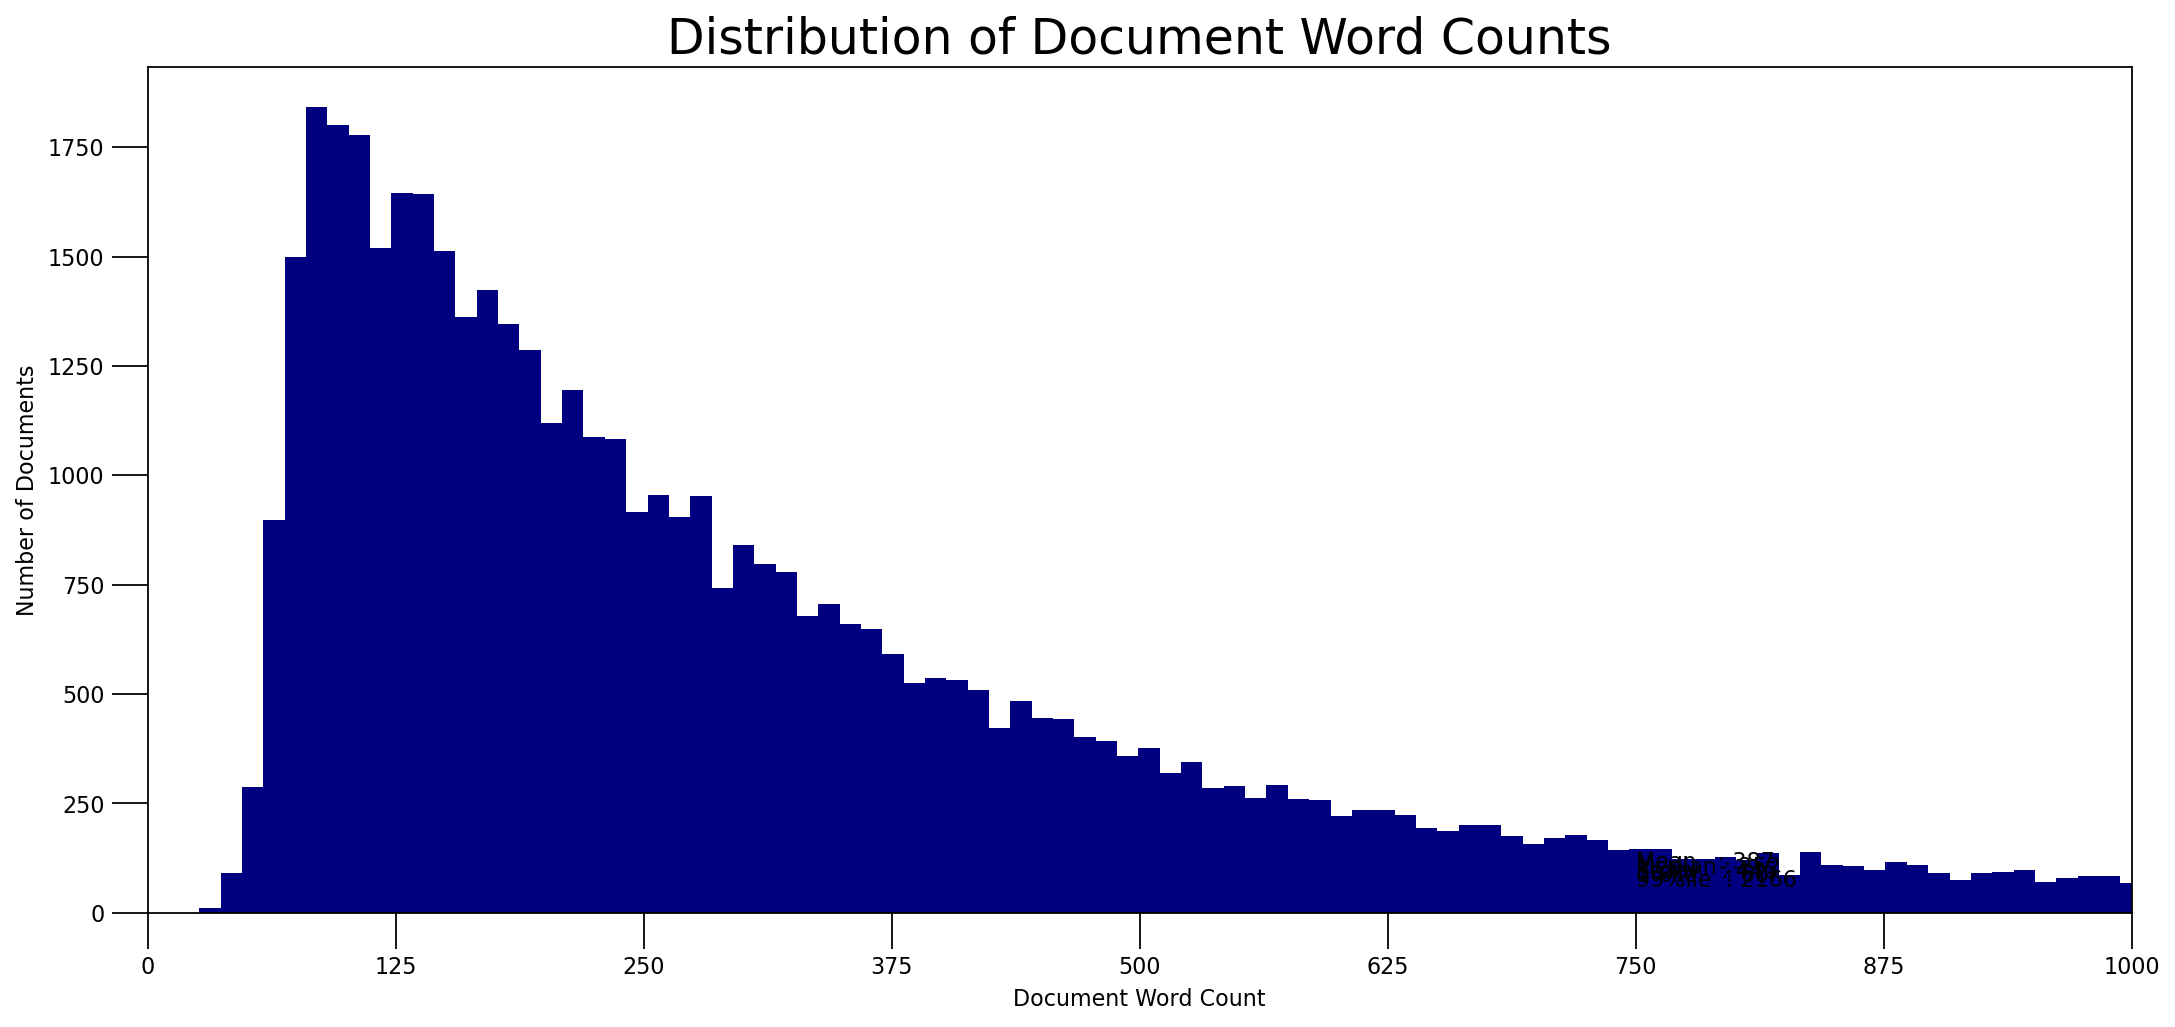

In [94]:
doc_lens = [len(d) for d in Review['review_text']]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

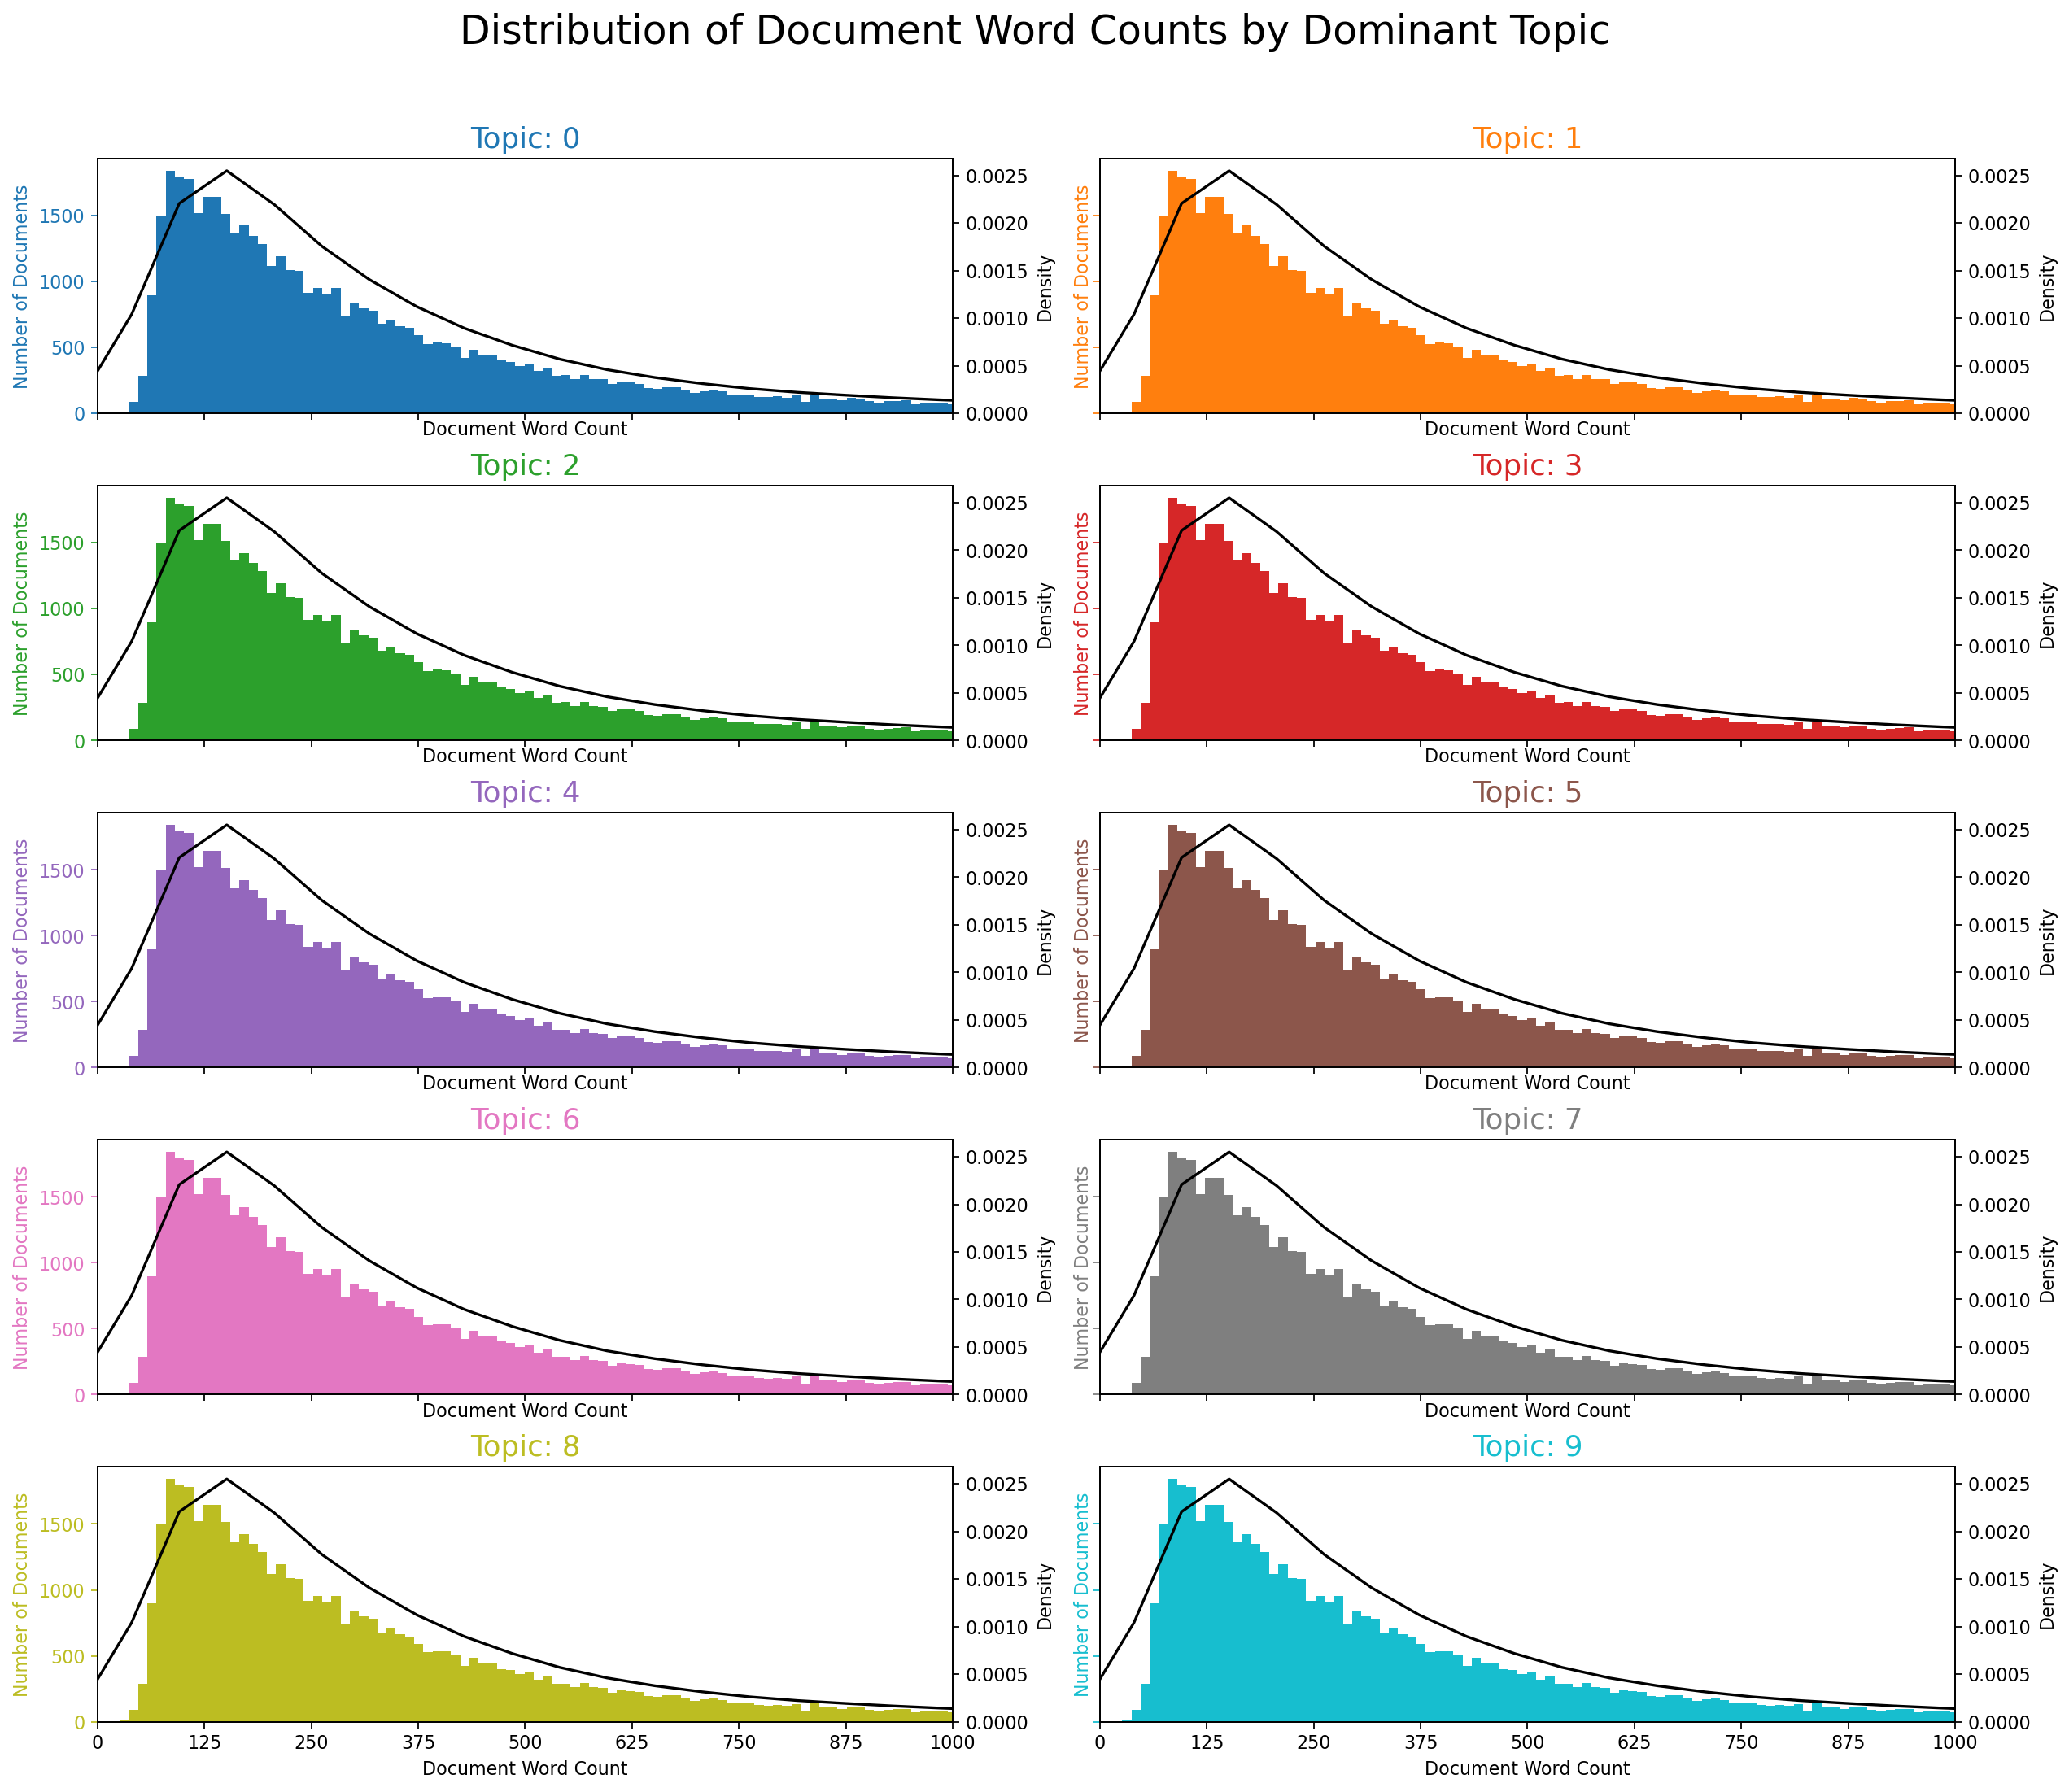

In [95]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    doc_lens = [len(d) for d in Review['review_text']]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

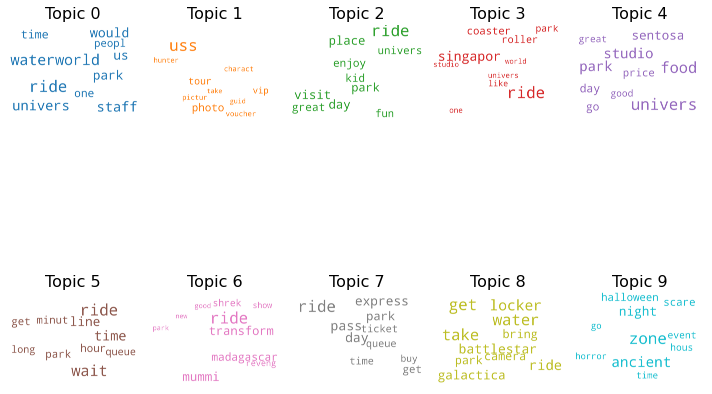

In [96]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [97]:
print(word_dict[0])

age


In [98]:
# topic Distribution
print(ldamodel.get_document_topics(doc_term_matrix[0]))
# First document is mainly for topic 0

[(0, 0.30606714), (5, 0.5467538), (7, 0.116136976), (8, 0.026525307)]


In [99]:
import pickle
file=open("topicmodel","wb")
pickle.dump(ldamodel,file)
file.close()

file=open("topicmodel","rb")
model=pickle.load(file)
file.close()

In [100]:
topic_distribution_list=[]
for i in doc_term_matrix:
    dist=dict(model.get_document_topics(i))
    result= dict.fromkeys(list(range(3)),0)
    result.update(dist)
    topic_distribution_list.append(result)

In [101]:
data_df= pd.DataFrame(topic_distribution_list)
print(data_df)

              0         1         2         5         7         8         4  \
0      0.306066  0.000000  0.000000  0.546758  0.116134  0.026525       NaN   
1      0.561525  0.000000  0.000000  0.260595       NaN       NaN  0.144526   
2      0.549558  0.000000  0.000000  0.339257       NaN       NaN       NaN   
3      0.234585  0.000000  0.000000  0.359201       NaN  0.379269       NaN   
4      0.118447  0.000000  0.536493  0.016568  0.233674       NaN       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
50854  0.295626  0.149334  0.000000  0.102319  0.084325  0.060708  0.217148   
50855  0.202522  0.044813  0.035731       NaN       NaN  0.211289       NaN   
50856  0.333840  0.024886  0.271497  0.173534  0.147214       NaN       NaN   
50857  0.250878  0.000000  0.173779  0.098981  0.277861  0.108969       NaN   
50858  0.000000  0.098698  0.223813  0.272343       NaN  0.054242  0.276995   

              3         9         6  
0           N